# 08년 포르투갈 중학교 2곳의 학생 성적 및 인적정보 데이터 분석

## 환경 세팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
por = pd.read_csv("student-por.csv")  # Portuguese Performance
mat = pd.read_csv("student-mat.csv")  # Mathematics Performance

## 분석 목적 및 변수 확인
  - 분석 목적 : 학생 성적에 영향을 미치는 요인 분석

In [3]:
por.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
mat.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
mat.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

`Medu` : 어머니의 교육수준 (0 ~ 4)  
`Fedu` : 아버지의 교육수준 (0 ~ 4)  
`Mjob` : 어머니의 직업  
`Fjob` : 아버지의 직업  
`schoolsup` : 보충 수업 유무  
`famsup`: 가족의 지원 유무  
`paid` : 사교육 유무  
`activities` : 정규과목 외 활동 유무  
`nursery` : 유치원에 다녔었는지 여부  
`higher` : 진학 희망 여부  
`internet` : 가정 내 인터넷 연결 여부  
`romantic` : 연애 상태  
`famrel` : 가정 내 분위기 (1 ~ 5)  
`Dalc` : 평일 알콜 소비량 (와인 추정, 1 ~ 5)  
`Walc` : 주말 알콜 소비량 (와인 추정, 1 ~ 5)  

`G1` : 1학년 성적 (0 ~ 20)  
`G2` : 2학년 성적 (0 ~ 20)  
`G3` : 3학년 성적 (0 ~ 20)

In [6]:
# NaN 값 유무

mat.isnull().values.any() or por.isnull().values.any()

False

## 데이터 훑어보기

In [7]:
mat.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [8]:
por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [9]:
mat.corr()[abs(mat.corr()) > 0.1]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.163658,-0.163438,NaN,NaN,0.243665,NaN,NaN,0.126964,0.131125,0.117276,NaN,0.175230,NaN,-0.143474,-0.161579
Medu,-0.163658,1.000000,0.623455,-0.171639,NaN,-0.236680,NaN,NaN,NaN,NaN,NaN,NaN,0.100285,0.205341,0.215527,0.217147
Fedu,-0.163438,0.623455,1.000000,-0.158194,NaN,-0.250408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190270,0.164893,0.152457
traveltime,NaN,-0.171639,-0.158194,1.000000,-0.100909,NaN,NaN,NaN,NaN,0.138325,0.134116,NaN,NaN,NaN,-0.153198,-0.117142
studytime,NaN,NaN,NaN,-0.100909,1.000000,-0.173563,NaN,-0.143198,NaN,-0.196019,-0.253785,NaN,NaN,0.160612,0.135880,NaN
failures,0.243665,-0.236680,-0.250408,NaN,-0.173563,1.000000,NaN,NaN,0.124561,0.136047,0.141962,NaN,NaN,-0.354718,-0.355896,-0.360415
famrel,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.150701,NaN,NaN,-0.113397,NaN,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,-0.143198,NaN,0.150701,1.000000,0.285019,0.209001,0.147822,NaN,NaN,NaN,NaN,NaN
goout,0.126964,NaN,NaN,NaN,NaN,0.124561,NaN,0.285019,1.000000,0.266994,0.420386,NaN,NaN,-0.149104,-0.162250,-0.132791
Dalc,0.131125,NaN,NaN,0.138325,-0.196019,0.136047,NaN,0.209001,0.266994,1.000000,0.647544,NaN,0.111908,NaN,NaN,NaN


In [10]:
por.corr()[abs(por.corr()) > 0.1]

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.107832,-0.121050,NaN,NaN,0.319968,NaN,NaN,0.112805,0.134768,NaN,NaN,0.149998,-0.174322,-0.107119,-0.106505
Medu,-0.107832,1.000000,0.647477,-0.265079,NaN,-0.172210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260472,0.264035,0.240151
Fedu,-0.121050,0.647477,1.000000,-0.208288,NaN,-0.165915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.217501,0.225139,0.211800
traveltime,NaN,-0.265079,-0.208288,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.154120,-0.154489,-0.127173
studytime,NaN,NaN,NaN,NaN,1.000000,-0.147441,NaN,NaN,NaN,-0.137585,-0.214925,NaN,-0.118389,0.260875,0.240498,0.249789
failures,0.319968,-0.172210,-0.165915,NaN,-0.147441,1.000000,NaN,0.108995,NaN,0.105949,NaN,NaN,0.122779,-0.384210,-0.385782,-0.393316
famrel,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.129216,NaN,NaN,NaN,0.109559,NaN,NaN,NaN,NaN
freetime,NaN,NaN,NaN,NaN,NaN,0.108995,0.129216,1.000000,0.346352,0.109904,0.120244,NaN,NaN,NaN,-0.106678,-0.122705
goout,0.112805,NaN,NaN,NaN,NaN,NaN,NaN,0.346352,1.000000,0.245126,0.388680,NaN,NaN,NaN,NaN,NaN
Dalc,0.134768,NaN,NaN,NaN,-0.137585,0.105949,NaN,0.109904,0.245126,1.000000,0.616561,NaN,0.172952,-0.195171,-0.189480,-0.204719


포르투갈어의 경우 공부시간과 성적이 약 0.25정도의 양의 상관관계를 보이는 데 비해 수학에선 그러한 상관관계가 나타나지 않았다.\
수학은 포르투갈어보다 공부량에 영향을 덜 받는 과목이라고 생각된다.

## 데이터 톺아보기

가설 : _연애 유무가 성적에 영향을 줄 것이다._

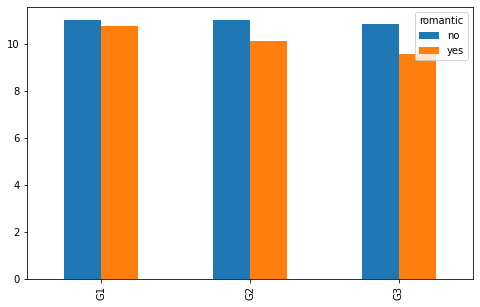

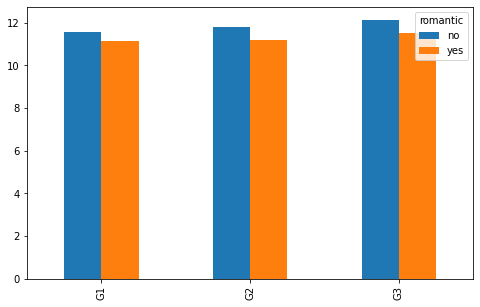

In [11]:
mat[['G1','G2','G3', 'romantic']].groupby('romantic').mean().T.plot(kind='bar', figsize=(8,5))
por[['G1','G2','G3', 'romantic']].groupby('romantic').mean().T.plot(kind='bar', figsize=(8,5))
plt.show()

미세하게 비연애자가 성적이 높은 경향이 있으나 1~2점 정도 표준 편차 이내의 작은 편차이므로 **연애 유무는 성적에 큰 영향을 주지 않는다** 볼 수 있다.  

---

가설 : _부모의 교육 수준이 성적에 영향을 줄 것이다._

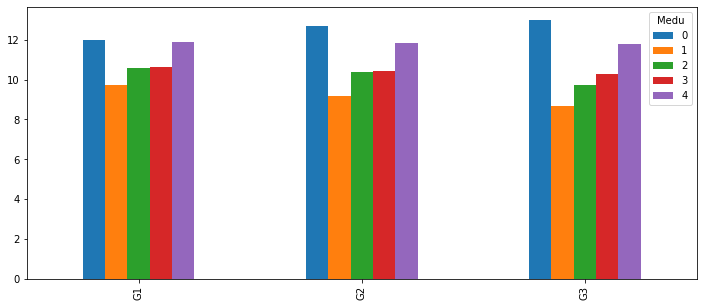

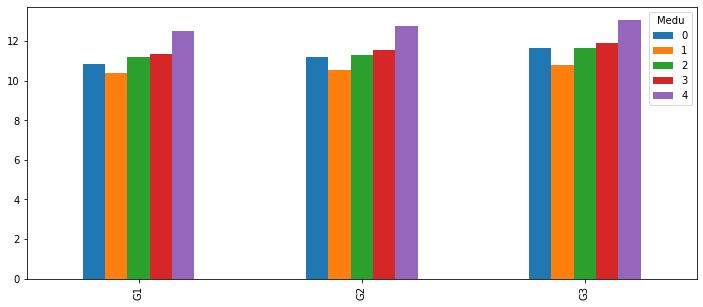

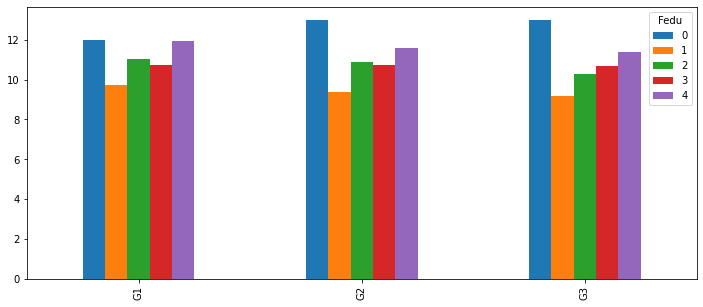

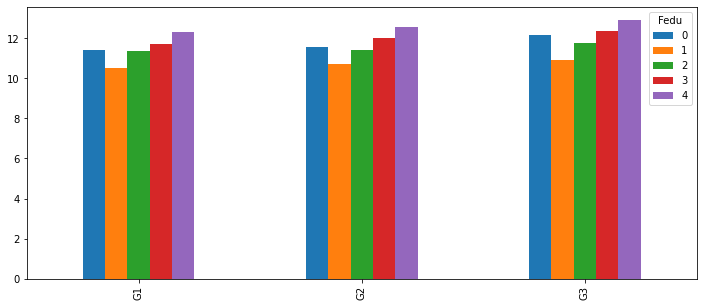

In [12]:
mat[['G1','G2','G3', 'Medu']].groupby('Medu').mean().T.plot(kind='bar', figsize=(12,5))
por[['G1','G2','G3', 'Medu']].groupby('Medu').mean().T.plot(kind='bar', figsize=(12,5))
mat[['G1','G2','G3', 'Fedu']].groupby('Fedu').mean().T.plot(kind='bar', figsize=(12,5))
por[['G1','G2','G3', 'Fedu']].groupby('Fedu').mean().T.plot(kind='bar', figsize=(12,5))
plt.show()

대체적으로 부모의 교육수준과 자녀의 성적이 비례하나 부모의 교육수준이 0 (교육 경험 없음) 인 경우 알 수 없는 이유로 자녀의 성적이 높았다.  

---

가설 : _사교육 유무가 성적에 영향을 줄 것이다._

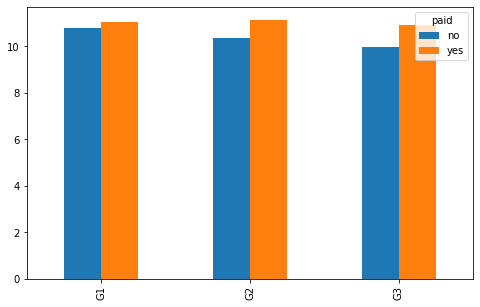

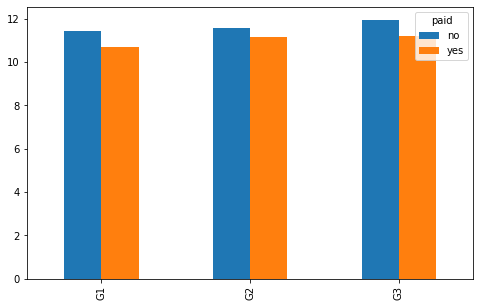

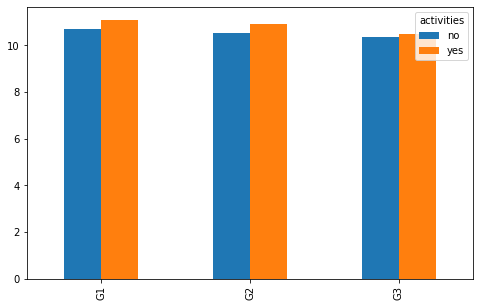

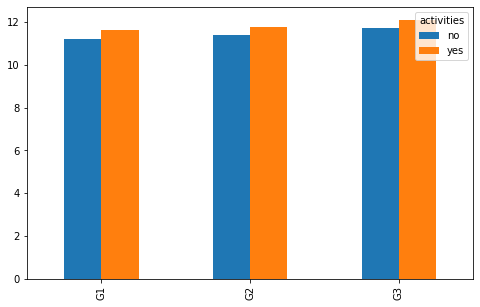

In [13]:
mat[['G1','G2','G3', 'paid']].groupby('paid').mean().T.plot(kind='bar', figsize=(8, 5))
por[['G1','G2','G3', 'paid']].groupby('paid').mean().T.plot(kind='bar', figsize=(8, 5))
mat[['G1','G2','G3', 'activities']].groupby('activities').mean().T.plot(kind='bar', figsize=(8, 5))
por[['G1','G2','G3', 'activities']].groupby('activities').mean().T.plot(kind='bar', figsize=(8, 5))

plt.show()

사교육 유무는 성적에 큰 영향을 미치지 못했으며 포르투갈어의 경우 오히려 사교육을 받는 경우의 성적이 더 낮았다.  
대신 정규 과목 외 활동 여부가 더 일관성 있는 양의 상관관계를 보이고 있다.

---

가설 : _고등 교육과정으로 진학하고 싶어할 수록 성적이 좋을 것이다._

<AxesSubplot:>

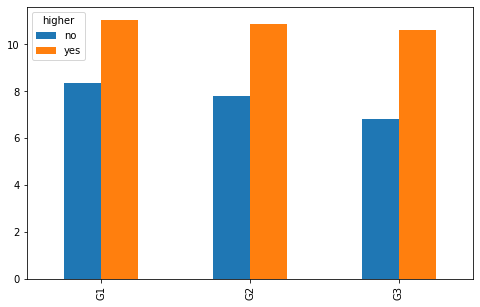

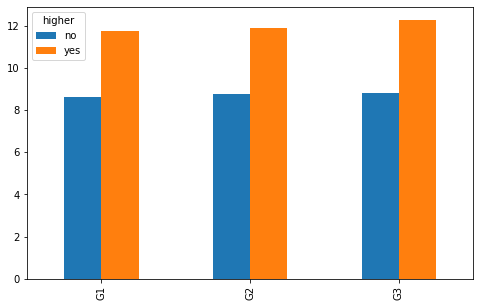

In [14]:
mat[['G1','G2','G3', 'higher']].groupby('higher').mean().T.plot(kind='bar', figsize=(8, 5))
por[['G1','G2','G3', 'higher']].groupby('higher').mean().T.plot(kind='bar', figsize=(8, 5))

성적이 좋아서 상위 과정에 진학하려고 하든, 상위 과정에 진학하기 위해 성적을 높인 것이든 성적과 진학 희망 여부는 **강한 양의 상관관계**를 보이고 있다.

---